# ENTRENANDO MODELO DE ML PARA PREDECIR SALARIOS EN DATA SCIENCE
## DATASET: salaries_encoded.csv

# PASO 1 - INSTALAMOS E IMPORTAMOS LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style='whitegrid',context='notebook')

# PASO 2 CARGAMOS EL DATASET

In [ ]:
df = pd.read_csv('salaries_encoded.csv')
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,0,2,95,69120,64,0,62,1
1,2025,0,2,95,50160,64,0,62,1
2,2025,0,2,114,158113,91,0,86,1
3,2025,0,2,114,87795,91,0,86,1
4,2025,1,2,114,195230,91,0,86,1
...,...,...,...,...,...,...,...,...,...
103208,2021,3,2,167,165000,91,100,86,0
103209,2021,2,2,276,151000,91,100,86,0
103210,2020,0,2,162,105000,91,100,86,2
103211,2020,0,0,61,100000,91,100,86,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103213 entries, 0 to 103212
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   work_year           103213 non-null  int64
 1   experience_level    103213 non-null  int64
 2   employment_type     103213 non-null  int64
 3   job_title           103213 non-null  int64
 4   salary_in_usd       103213 non-null  int64
 5   employee_residence  103213 non-null  int64
 6   remote_ratio        103213 non-null  int64
 7   company_location    103213 non-null  int64
 8   company_size        103213 non-null  int64
dtypes: int64(9)
memory usage: 7.1 MB


In [ ]:
df.describe()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,103213.000000,103213.000000,103213.000000,103213.000000,103213.000000,103213.000000,103213.000000,103213.000000,103213.000000
mean,2024.185887,2.368713,1.997452,176.063325,152547.460727,84.500024,21.356321,79.952215,0.972969
std,0.671240,0.921471,0.114720,91.733723,63681.014279,20.202158,40.892154,18.915739,0.174382
min,2020.000000,0.000000,0.000000,0.000000,15000.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.000000,2.000000,2.000000,109.000000,105070.000000,91.000000,0.000000,86.000000,1.000000
50%,2024.000000,3.000000,2.000000,162.000000,145000.000000,91.000000,0.000000,86.000000,1.000000
75%,2025.000000,3.000000,2.000000,247.000000,193000.000000,91.000000,0.000000,86.000000,1.000000
max,2025.000000,3.000000,3.000000,343.000000,337500.000000,97.000000,100.000000,91.000000,2.000000


## PASO 3 - PREPROCESAMIENTO DE VARIABLES NUMÉRICAS

In [ ]:
# Convertimos el salario a miles para facilitar la interpretación
df['salary_in_usd'] = df['salary_in_usd'] / 1000
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,0,2,95,69.120,64,0,62,1
1,2025,0,2,95,50.160,64,0,62,1
2,2025,0,2,114,158.113,91,0,86,1
3,2025,0,2,114,87.795,91,0,86,1
4,2025,1,2,114,195.230,91,0,86,1
...,...,...,...,...,...,...,...,...,...
103208,2021,3,2,167,165.000,91,100,86,0
103209,2021,2,2,276,151.000,91,100,86,0
103210,2020,0,2,162,105.000,91,100,86,2
103211,2020,0,0,61,100.000,91,100,86,0


# PASO 4: VERIFICACIÓN DE VARIABLES
## El dataset ya viene codificado, verificamos los tipos de datos

In [ ]:
# Verificamos que todas las columnas sean numéricas
df.dtypes

,0
work_year,int64
experience_level,int64
employment_type,int64
job_title,int64
salary_in_usd,float64
employee_residence,int64
remote_ratio,int64
company_location,int64
company_size,int64


In [ ]:
# Verificamos valores únicos de cada columna
for col in df.columns:
    print("*"*50)
    print(f"{col}: {df[col].nunique()} valores únicos")

**************************************************
work_year: 6 valores únicos
**************************************************
experience_level: 4 valores únicos
**************************************************
employment_type: 4 valores únicos
**************************************************
job_title: 344 valores únicos
**************************************************
salary_in_usd: 10149 valores únicos
**************************************************
employee_residence: 98 valores únicos
**************************************************
remote_ratio: 3 valores únicos
**************************************************
company_location: 92 valores únicos
**************************************************
company_size: 3 valores únicos


# PASO 5 - CORRELACIONES

In [ ]:
corr_matrix = df.corr()
corr_salary = corr_matrix['salary_in_usd']
corr_salary.sort_values(ascending=False)

,salary_in_usd
salary_in_usd,1.000000
experience_level,0.314289
job_title,0.267974
employee_residence,0.231857
company_location,0.228420
work_year,0.015602
employment_type,0.012943
company_size,-0.018274
remote_ratio,-0.048012


<Axes: >

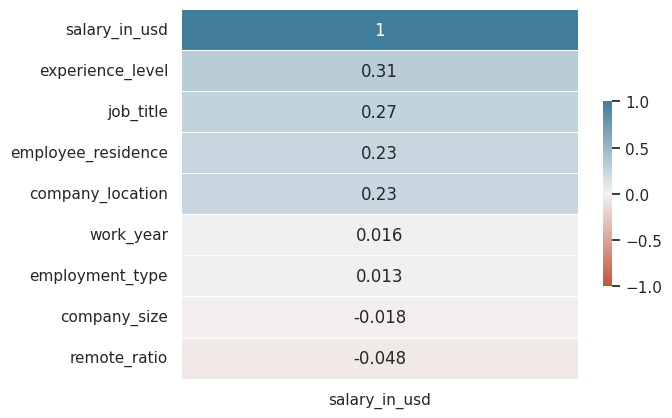

In [ ]:
sns.heatmap(
    data=corr_salary.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

## PASO 6 - IDENTIFICAMOS VARIABLE X y Y, dividimos en train test

In [ ]:
cols = corr_salary.index.tolist()
cols.remove('salary_in_usd')
cols

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [ ]:
X = df[cols].values
y = df['salary_in_usd'].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# CREAMOS UN CÓDIGO PARA PODER EVALUAR VARIOS MODELOS

## 1 - IMPORTAMOS LIBRERÍAS

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## 2 - ESCALAMIENTO DE DATOS

In [ ]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

## 3 - CREAMOS DICCIONARIO DE MODELOS

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=10),
    "SVR": SVR(kernel='rbf'),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

## 4 - CREAMOS BUCLE PARA PROBAR CADA MODELO DEL DICCIONARIO

In [ ]:
results = {}
for name,model in models.items():
    model.fit(X_train_scaled,y_train_scaled.ravel())
    y_pred_scaled = model.predict(X_test_scaled)

    r2 = r2_score(y_test_scaled, y_pred_scaled)
    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
    results[name] = {"R2": r2, "MSE": mse, "MAE": mae}

# MOSTRAMOS RESULTADOS DE LOS MODELOS ENTRENADOS

In [ ]:
results_df = pd.DataFrame(results).T
print("Model Comparison:")
display(results_df)

Model Comparison:


,R2,MSE,MAE
Linear Regression,0.193805,0.810089,0.720622
Lasso,0.164311,0.839725,0.737847
Ridge,0.193806,0.810088,0.720623
KNN Regressor,0.276042,0.727455,0.674528
SVR,0.244585,0.759063,0.680384
Random Forest Regressor,0.335169,0.668043,0.646739


# BUSCAMOS EL MEJOR MODELO

In [ ]:
best_r2_model = results_df['R2'].idxmax()
best_mse_model = results_df['MSE'].idxmin()
print(f"\nBest model based on R2: {best_r2_model} (R2: {results_df.loc[best_r2_model, 'R2']:.4f})")
print(f"Best model based on MSE: {best_mse_model} (MSE: {results_df.loc[best_mse_model, 'MSE']:.2f})")


Best model based on R2: Random Forest Regressor (R2: 0.3352)
Best model based on MSE: Random Forest Regressor (MSE: 0.67)


# GRAFICAMOS RESULTADOS

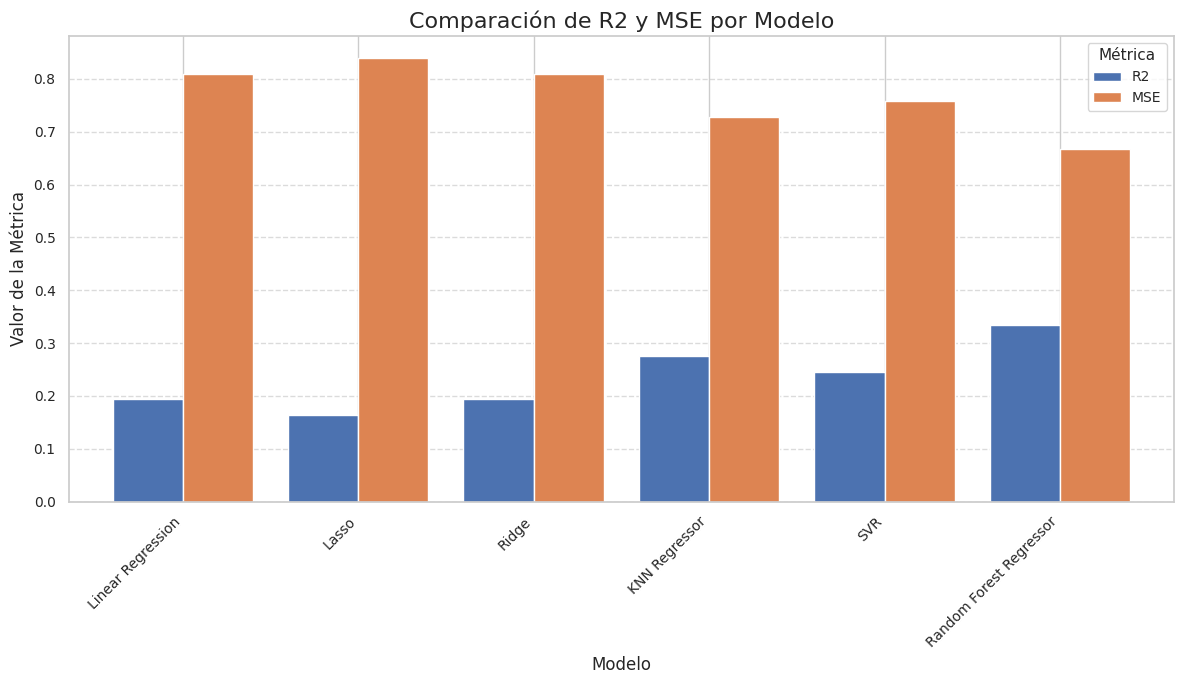

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las métricas R2 y MSE para comparar
results_to_plot = results_df[['R2', 'MSE']]

# Crear el gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(12, 7))
results_to_plot.plot(kind='bar', ax=ax, width=0.8)

plt.title('Comparación de R2 y MSE por Modelo', fontsize=16)
plt.ylabel('Valor de la Métrica', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Métrica', fontsize=10, title_fontsize='11')
plt.tight_layout()
plt.show()

# GUARDAMOS EL MEJOR MODELO

In [ ]:
import joblib
joblib.dump(models[best_r2_model],'model_salaries.pkl')
joblib.dump(scaler_X,'scaler_X_salaries.pkl')
joblib.dump(scaler_y,'scaler_y_salaries.pkl')

['scaler_y_salaries.pkl']

# FUNCIÓN PARA HACER PREDICCIONES

In [ ]:
import joblib
import numpy as np

# Load the best model and scalers
model = joblib.load('model_salaries.pkl')
scaler_X = joblib.load('scaler_X_salaries.pkl')
scaler_y = joblib.load('scaler_y_salaries.pkl')

def predict_salary(new_data):
    # Ensure new_data is a 2D array for scaling
    new_data_array = np.array(new_data).reshape(1, -1)

    # Scale the input data
    new_data_scaled = scaler_X.transform(new_data_array)

    # Make prediction using the model
    prediction_scaled = model.predict(new_data_scaled)

    # Inverse transform the prediction to get original salary scale
    prediction = scaler_y.inverse_transform(prediction_scaled.reshape(1, -1))

    return prediction[0][0]

print("Model and scalers loaded. You can now use the 'predict_salary' function.")

Model and scalers loaded. You can now use the 'predict_salary' function.


# EJEMPLO DE PREDICCIÓN

In [ ]:
# Mostramos el orden de las columnas para referencia
print("Orden de features para predicción:")
print(cols)

Orden de features para predicción:
['work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


In [ ]:
# Ejemplo: Predicción de salario
# Columnas: work_year, experience_level, employment_type, job_title, employee_residence, remote_ratio, company_location, company_size
# Ajusta los valores según el orden mostrado arriba

work_year = 2024
experience_level = 3  # 0=Entry, 1=Junior, 2=Mid, 3=Senior (codificado)
employment_type = 2   # Tipo de empleo codificado
job_title = 114       # Título del trabajo codificado
employee_residence = 91  # Residencia codificada
remote_ratio = 100    # 0, 50, o 100
company_location = 86  # Ubicación de la empresa codificada
company_size = 1       # Tamaño de la empresa codificado

# Construimos el array de datos en el orden correcto
data_list = [work_year, experience_level, employment_type, job_title, employee_residence, remote_ratio, company_location, company_size]
data_list

[2024, 3, 2, 114, 91, 100, 86, 1]

In [ ]:
new_employee_data = np.array(data_list)

predicted_salary = predict_salary(new_employee_data) * 1000  # Multiplicamos por 1000 porque dividimos antes
print(f"Predicted Salary: ${predicted_salary:,.2f} USD")

Predicted Salary: $160,370.00 USD


### Valores Únicos por Variable Categórica Codificada

In [ ]:
categorical_cols = [
    'work_year',
    'experience_level',
    'employment_type',
    'job_title',
    'employee_residence',
    'remote_ratio',
    'company_location',
    'company_size'
]

for col in categorical_cols:
    print(f"\n--- {col} ({df[col].nunique()} valores únicos) ---")
    display(df[col].unique())



--- work_year (6 valores únicos) ---


array([2025, 2023, 2024, 2022, 2020, 2021])


--- experience_level (4 valores únicos) ---


array([0, 1, 3, 2])


--- employment_type (4 valores únicos) ---


array([2, 3, 0, 1])


--- job_title (344 valores únicos) ---


array([ 95, 114, 197, 331,  30, 109, 140,  48, 231, 242,  69, 284, 162,
         4, 167, 301,  98, 317,  28, 319, 314,  39,  86, 302, 106, 247,
         0, 113, 322,  40, 327, 298,  66, 126, 131,  42, 294,  70, 318,
       139,   3, 178,  82, 270, 105,  60,  31, 337, 192, 264, 188, 153,
       206,  88, 343, 115,  33, 211, 328, 323, 228,  51, 142, 198, 132,
       205, 281, 200, 287, 116,  27, 336, 152,  23, 329, 244,  16, 288,
       310,  57, 216, 304, 340,  96, 320, 297, 339, 141,  80, 261,  92,
       127,   7,  45, 295, 299, 187, 289, 119, 257, 193,  59, 265,  84,
       148, 321, 283, 341,  21, 122, 309, 313, 330, 196, 150, 280, 154,
       175, 286, 120,   9,  81, 263, 268, 285, 291, 121,  65, 227,  15,
       181,  49, 224,  50, 335, 292, 133, 171, 241, 233, 107, 125,  20,
       333, 147, 118, 110, 184, 168, 156, 169,  71, 177, 315, 189, 180,
       137,  32, 296, 332, 143, 214,  58, 146, 199, 262, 155,  63, 103,
       215, 145, 290,  11, 136,  91, 311, 278,  72, 164, 209,  9


--- employee_residence (98 valores únicos) ---


array([64, 91, 13, 32, 15, 55, 43, 83,  5, 57, 31, 81,  6, 41, 22, 29, 23,
       96, 73, 30,  3,  1, 88,  9, 40, 49, 71, 69, 66,  8, 36, 48, 61, 12,
       46, 76, 89, 72, 20, 80, 39, 50, 68, 65, 84, 26, 16, 24, 18, 59, 62,
       95, 19, 97,  2, 56, 78, 42, 21, 52, 28, 54, 35, 63, 38, 51, 87, 70,
       37, 75, 93, 10, 94, 33, 79, 67,  7, 27, 90, 82, 60, 85, 74, 77, 86,
       34,  0, 58, 92, 14, 53, 45,  4, 17, 11, 25, 44, 47])


--- remote_ratio (3 valores únicos) ---


array([  0, 100,  50])


--- company_location (92 valores únicos) ---


array([62, 86, 12, 32, 15, 53, 43, 80,  5, 55, 31, 78,  6, 41, 22, 29, 23,
       90, 71, 30,  3,  1, 84,  9, 40, 48, 69, 67, 64,  8, 36, 47, 59, 10,
       46, 74, 85, 70, 20, 77, 39, 49, 66, 63, 81, 26, 16, 24, 18, 57, 60,
       89, 19, 91,  2, 54, 13, 42, 21, 51, 28, 52, 35, 61, 38, 50, 83, 68,
       37, 73, 87, 25,  4, 76, 65,  7, 27, 88, 34, 79, 58, 75, 72, 33,  0,
       14, 82, 45, 11, 44, 17, 56])


--- company_size (3 valores únicos) ---


array([1, 0, 2])